In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:

bias = 100

X, y, coef = make_regression(n_samples=1000, n_features=5, bias=bias, coef=True, noise=10, random_state=42)

In [3]:
coef, bias

(array([28.62798621, 46.07121713, 16.82365791, 24.74629812, 18.99347437]), 100)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()

In [6]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:

model.coef_, model.intercept_

(array([28.05749028, 45.94154566, 16.61187941, 24.53193249, 19.36893323]),
 99.3828533985921)

In [8]:
class CustomLinearRegression:
    
    def __init__(self, lr=.01):
        self.__lr = lr
        
    def fit(self, X, y):
        
        
        self.__mean = X.mean(axis=0)
        self.__std = X.std(axis=0)
        X = (X - self.__mean) /self.__std 
        self.__X = X
        self.__y = y
        self.coef_ = np.random.randn(X.shape[1])
        self.intercept_ = np.random.random()
        
        errors = []
        
        for k in range(20):
            self.gradient_decend()
            errors.append(self.error())
            
        return errors
            
    def gradient_decend(self):
        delta_coef, delta_bias = self.gradient()
        
        self.coef_ += delta_coef
        self.intercept_ += delta_bias
        
#         print(self.coef_, self.intercept_)
        
    def gradient(self):
        yh = self.hypo(self.__X)
        
        diff = (yh - self.__y.reshape(-1, 1))
        
        del_err_coef = (np.dot(diff.T, self.__X)).flatten() / len(yh)
        del_err_inter = (diff).mean()
        
        return -del_err_coef*self.__lr, -del_err_inter*self.__lr
        
    def hypo(self, X):
        mx = np.sum(X * self.coef_, axis=1, keepdims=True)
        return mx + self.intercept_
    def predict(self , X):
        X_mod = (X - self.__mean) / self.__std 
        y_h = self.hypo(X_mod)
        return y_h.flatten()
    
    def error(self):
        yh = self.hypo(self.__X)
        diff = (yh - self.__y.reshape(-1, 1))
        return (diff ** 2).mean()

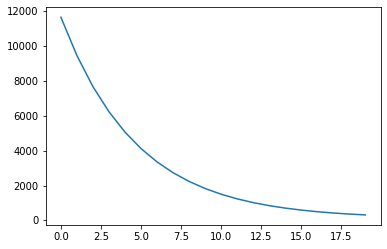

In [9]:
model = CustomLinearRegression(lr=.1)
errs = model.fit(X, y)
plt.figure()
plt.plot(errs)

In [10]:
model.coef_

array([23.27771987, 40.51058366, 15.06745218, 21.24242944, 17.31776843])

In [11]:
from sklearn.datasets import load_boston

In [12]:
d = load_boston()

In [13]:
X, y = d.data, d.target

In [14]:
model = CustomLinearRegression()

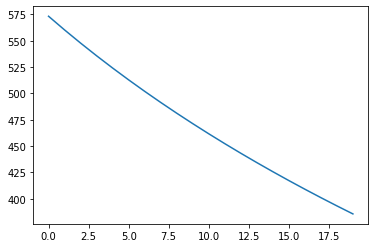

In [15]:
error  = model.fit(X, y)
plt.figure()
plt.plot(error)

In [16]:

model.coef_

array([-0.60554224,  0.34078525, -1.31475647, -0.86128589, -1.57647912,
        1.30729289,  0.33670561,  0.68264045, -0.96078047,  1.51203918,
       -0.59677386,  1.32881866,  0.15199252])

In [17]:
model.intercept_

4.365254260848135

In [18]:
model.predict(X[:10])

array([8.69769319, 7.42472073, 8.46633483, 8.84235549, 9.30184502,
       7.98005375, 7.04119075, 7.97710417, 7.13426429, 7.55635034])

In [19]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [20]:
len(X)

506

In [21]:
X.shape[1]

13